In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("sim_data_c46f26f9-7546-ed11-a9fd-b88303911bc1.csv")

In [5]:
foo = df.groupby(["transmission_level", "scenario_number"]).agg("mean").reset_index()

In [7]:
foo.columns

Index(['transmission_level', 'scenario_number', 'iptsc_rdts_used',
       'iptsc_drugs_used', 'cases_treated', 'severe_cases_treated',
       'received_smc', 'received_ivermectin', 'received_primaquine', 'pfpr0_5',
       'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'Run_Number'],
      dtype='object')

<AxesSubplot:xlabel='transmission_level', ylabel='clinical_incidence_all'>

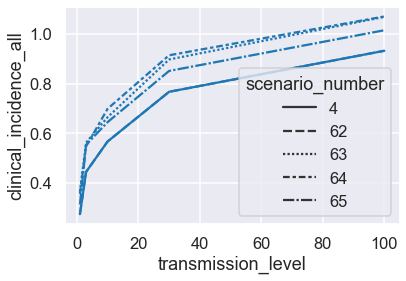

In [9]:
sns.lineplot(data=foo, x="transmission_level", y="clinical_incidence_all", style="scenario_number")

In [16]:
df.columns

Index(['iptsc_rdts_used', 'iptsc_drugs_used', 'cases_treated',
       'severe_cases_treated', 'received_smc', 'received_ivermectin',
       'received_primaquine', 'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500',
       'pfpr_all', 'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'baseline_transmission_metric', 'Run_Number',
       'scenario_number', 'smc_drug_config', 'transmission_level'],
      dtype='object')

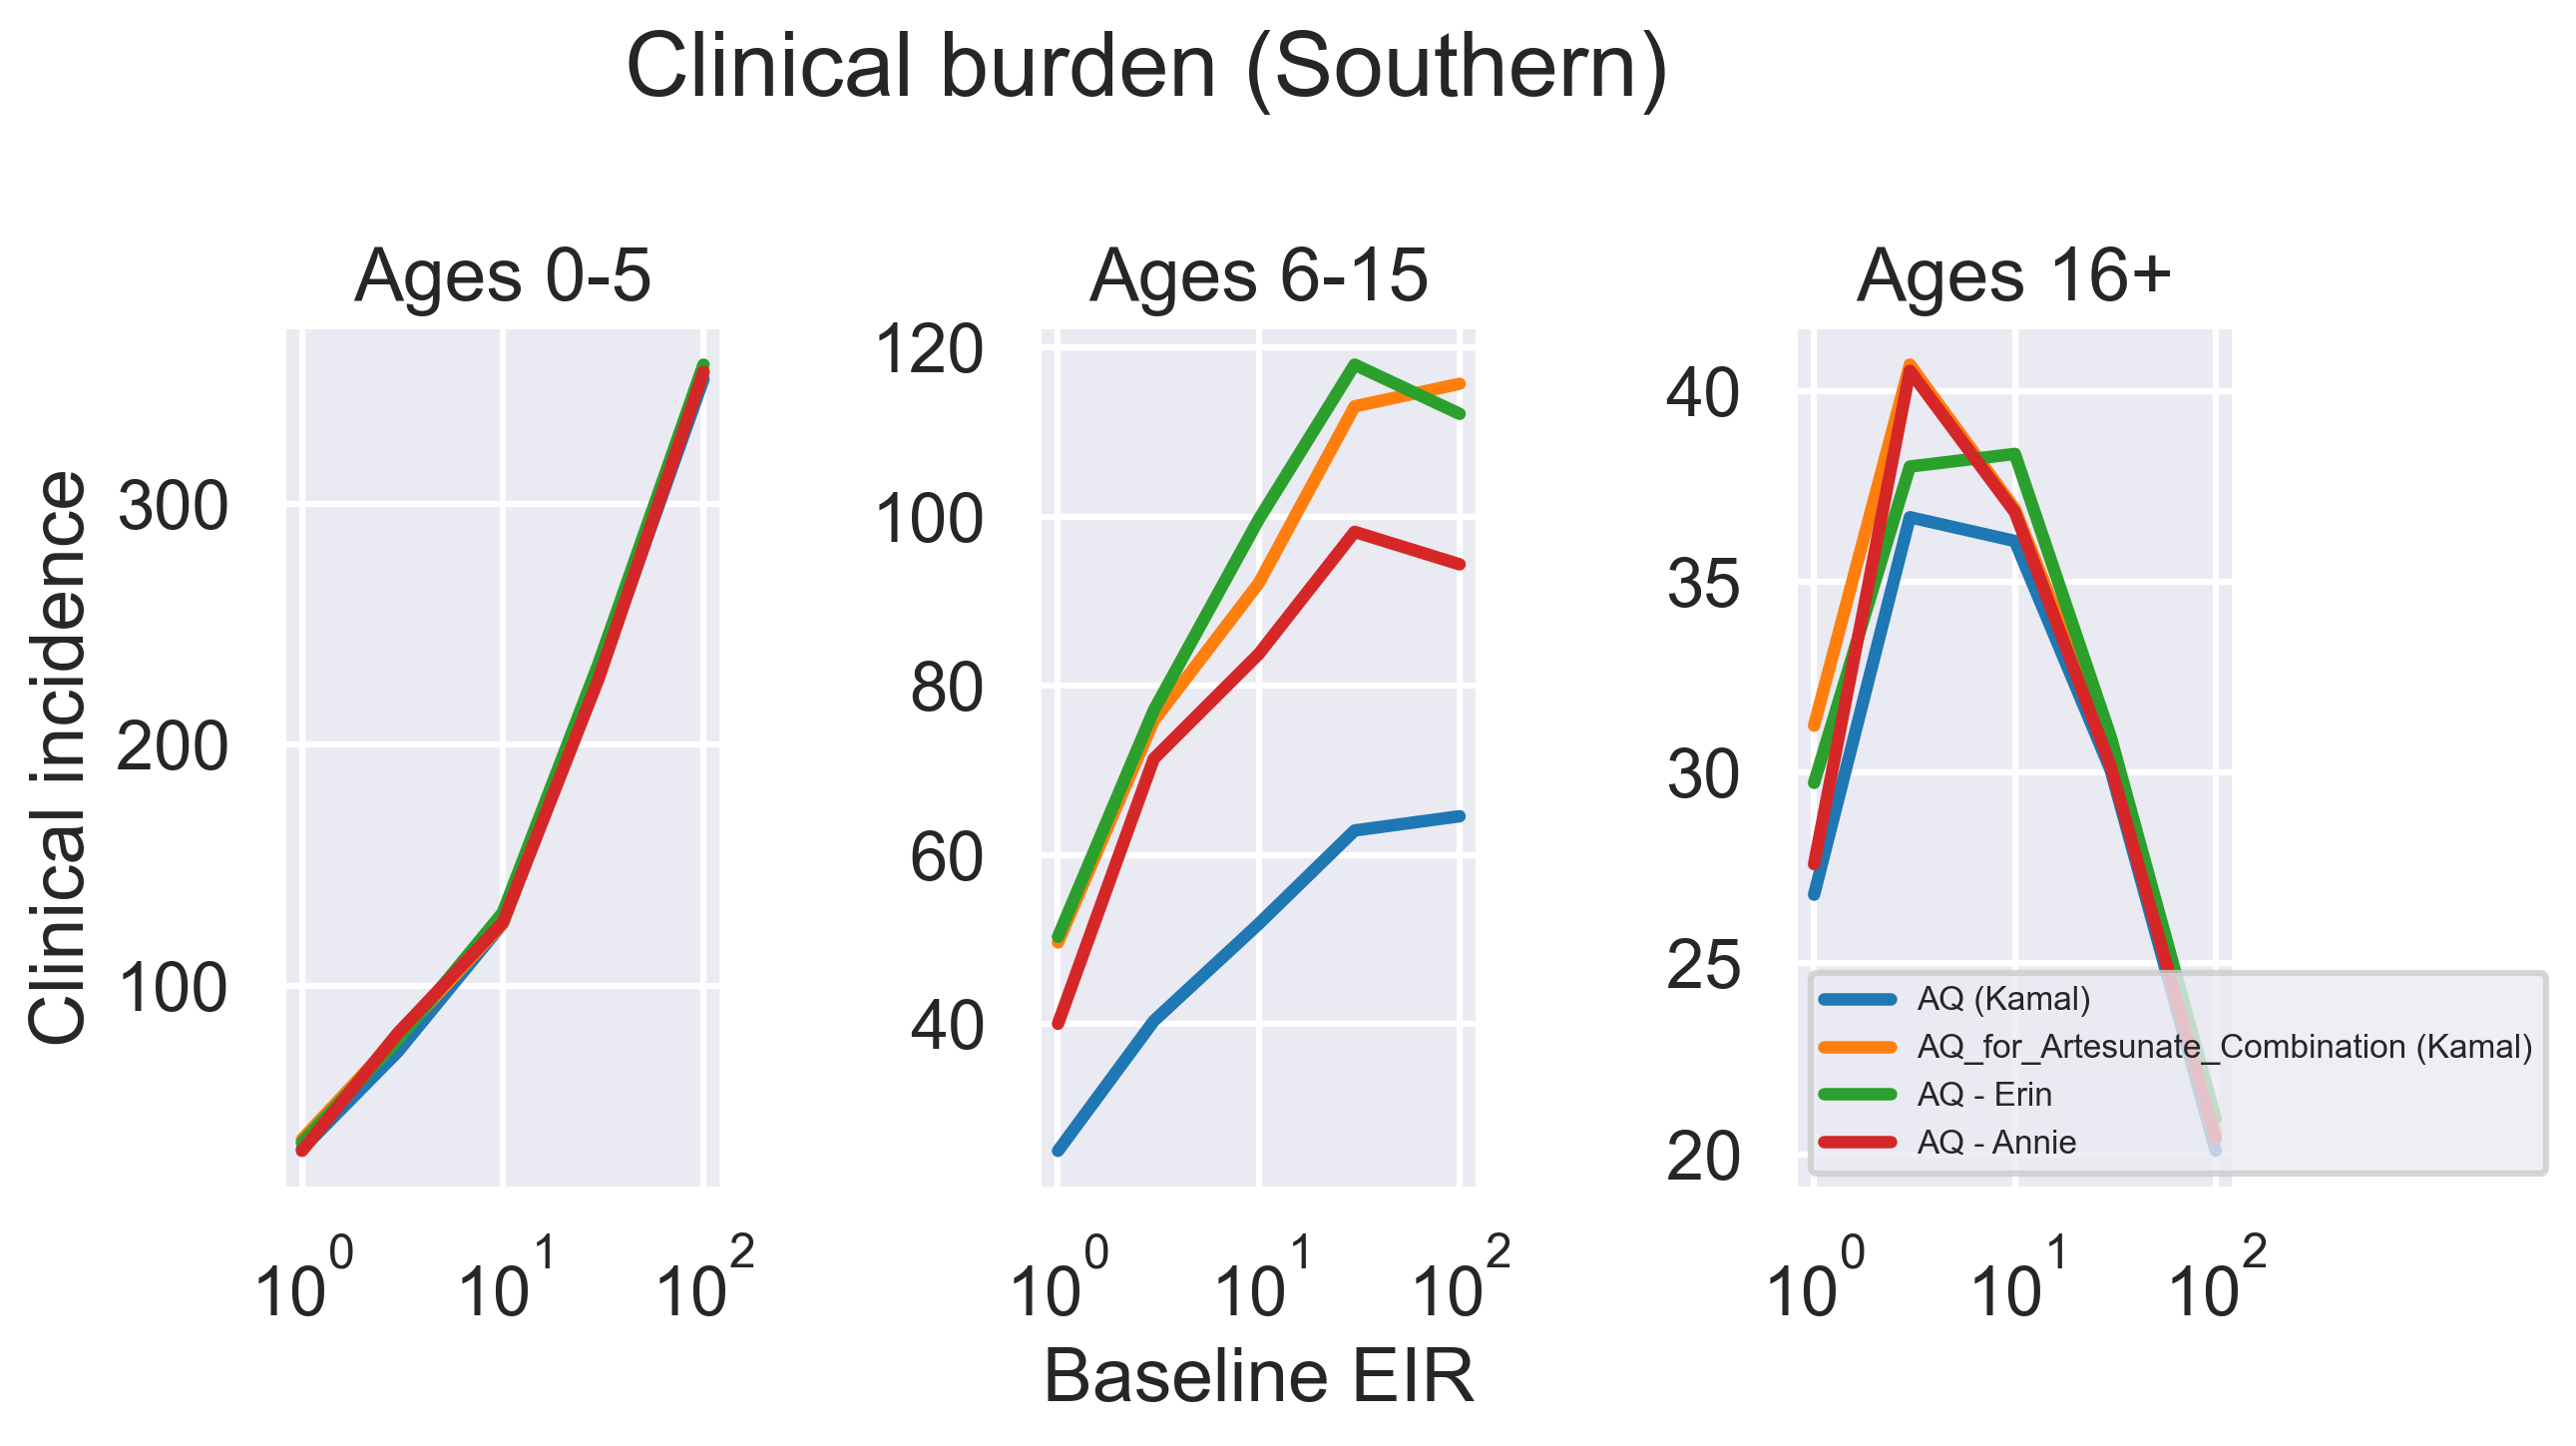

In [25]:
df_agg = foo

label_dict = {
    62: "AQ (Kamal)",
    63: "AQ_for_Artesunate_Combination (Kamal)",
    64: "AQ - Erin",
    65: "AQ - Annie"
}

# scenario_list = list(label_dict.keys())
scenario_list = [62,63,64,65]

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

color_dict = None
# color_dict = {
#     1: "#5292C2", 
#     4: "#5292C2",
#     13: "#F48420", 
#     16: "#F48420",
#     31: "black"
# }

# linestyle_dict = {
#     1: "dashed",
#     4: "solid",
#     13: "dashed",
#     16: "solid",
#     31: "dotted"
# }

    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = 100*s_dict[s][f"clinical_incidence{agebin}"]
        plt.plot(x,y, lw=3, label=label_dict[s])
        if i == 2:
            plt.legend(fontsize=8)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Clinical incidence")
        # plt.ylim([0,100])
        plt.title(agebin_label)
        plt.xscale("log")
    
plt.suptitle("Clinical burden (Southern)")
plt.tight_layout()

# plt.savefig("cases_averted_southern.pdf")